# Exam 1

## Honesty Pledge

This exam is open-Internet. I understand that I am allowed to use any existing resources on the web, including web search, but I am not allowed to consult with any people during this exam. Giving and receiving help are both forbidden and will be prosecuted equally.

I understand that the penalty for violating this pledge is a grade of **F** in the course and disciplinary action by the Office of Student Rights & Responsibilities. Please sign below to indicate that you have read and understood this pledge. Your project will not be graded unless you sign below.

YOUR ANSWER HERE

## Description

In this in-class project, we will revisit the baby names data from lecture. The data can be found in the directory `/data/babynames/`. The files in this directory are all of the form `yobXXXX.csv`, where `XXXX` is a year. Each file consists of rows specifying a name, a gender, and a count of how many babies with that name and gender were born in the year `XXXX`.

We will begin by looking at data from the year 2010.

**Remember:** vectorization > for loop > manually writing out every case. Partial credit will be awarded even for brute-force solutions!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("/data/babynames/yob2010.txt", names=["Name", "Gender", "Count"])

In [3]:
data.head()

,Name,Gender,Count
0,Isabella,F,22890
1,Sophia,F,20623
2,Emma,F,17327
3,Olivia,F,17017
4,Ava,F,15421


## Question 1 (10 points)

How many babies born in 2010 (of either gender) had the same name as you? 

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [4]:
data[data.Name == "Nicolas"]["Count"]

19966    2390
Name: Count, dtype: int64

## Question 2 (10 points)

How many girls born in 2010 had names that began with the letter S?

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [44]:
data[data["Gender"] == "F"][data["Name"].str[0] == "S"]["Count"].sum()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


138078

## Question 3 (10 points)

What was the most common first letter of names of babies born in 2010? What was the least common first letter? You may find `.str.get()` method of Pandas Series helpful.

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [6]:
print("Max:",data.groupby(data["Name"].str.get(0))["Count"].count().argmax(), data.groupby(data["Name"].str.get(0))["Count"].count().max())
print("Min:",data.groupby(data["Name"].str.get(0))["Count"].count().argmin(), data.groupby(data["Name"].str.get(0))["Count"].count().min())

Max: A 4410
Min: U 69


## Question 4a (10 points)

How many of the 2010 names can serve as both boys' and girls' names?

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [7]:
(data.groupby("Name")["Gender"].count() == 2).sum()

2441

## Question 4b (10 points)

Obviously, most mixed-gender names are very heavily skewed towards one gender or the other. For example, "William" is technically a mixed-gender name, but only 14 girls in 2010 were named William, compared with 16570 boys. Similarly, "Emma" is technically a mixed-gender name, but only 18 boys in 2010 were named Emma.

If we want to know which are the most gender-ambiguous names, we should sort the names by the frequency of the less common gender. This way, even though William is a very common name overall, it would not be at the top of the list since the frequency of its less common gender (female) is only 14. Likewise, the frequency of the less common gender of Emma (male) is 18.

Sort the mixed-gender names in decreasing order by the frequency of the less common gender. What are the Top 5 gender-ambiguous names?

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [8]:
unisex = (data.groupby("Name")["Gender"].count() == 2).reset_index(name="Unisex")
data_merged = data.merge(unisex, how='right', on=["Name"])
males = data_merged[data_merged["Gender"] == "M"]
females = data_merged[data_merged["Gender"] == "F"]
data_clean = males.merge(females, on=["Name"])
data_clean.head()

,Name,Gender_x,Count_x,Unisex_x,Gender_y,Count_y,Unisex_y
0,Isabella,M,30,True,F,22890,True
1,Sophia,M,26,True,F,20623,True
2,Emma,M,17,True,F,17327,True
3,Olivia,M,28,True,F,17017,True
4,Ava,M,17,True,F,15421,True


In [9]:
data_clean["FreqLess"] = (data_clean[["Count_x", "Count_y"]].min(axis=1))
data_clean.sort(columns="FreqLess", ascending=False).head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Name,Gender_x,Count_x,Unisex_x,Gender_y,Count_y,Unisex_y,FreqLess
38,Riley,M,3640,True,F,5535,True,3640
48,Peyton,M,2641,True,F,4967,True,2641
112,Hayden,M,4183,True,F,1891,True,1891
114,Jordan,M,8224,True,F,1725,True,1725
21,Avery,M,1697,True,F,6670,True,1697


## Question 5a (10 points)

The **entropy** of a distribution is a measure of how diverse its values are. A distribution which is usually one of a handful of values is said to have "low entropy", while a distribution which takes on many different values is said to 
have "high entropy".

How diverse are human names? Let's calculate the entropy of the distribution of names in 2010. If a distribution takes on n values, each one with probability $p_i$, then the entropy $H$ is defined as 
$$ H = -\sum_{i=1}^n p_i \log_2(p_i). $$

Calculate the entropy of the distribution of names in 2010.

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [10]:
data.head()

,Name,Gender,Count
0,Isabella,F,22890
1,Sophia,F,20623
2,Emma,F,17327
3,Olivia,F,17017
4,Ava,F,15421


In [11]:
total = data.Count.sum()
def entropy(sample):
    prob = sample/total
    return prob*np.log2(prob)
print("2010 Entropy:",-(data["Count"].apply(entropy).sum()))

2010 Entropy: 11.472701936742652


## Question 5b (10 points)

Calculate the entropy for every year between 1880 and 2014. Make a line plot of the entropy over time. Interpret what you see in context.

In [45]:
dfs = []
for year in range(1880,2014):
    filename = "/data/babynames/yob%d.txt" % year
    dataIN = pd.read_csv(filename, names=["Name","Gender","Count"])
    dataIN["Year"] = year
    dfs.append(dataIN) 
    
dataAll = pd.concat(dfs)
dataAll.head()

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


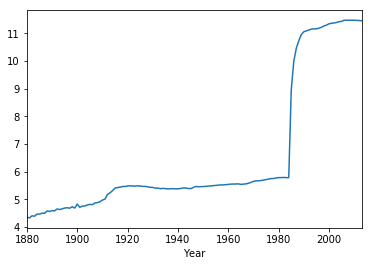

In [46]:
dataAll["Entropy"] = data["Count"].apply(entropy)
entropies = -(dataAll.groupby("Year")["Entropy"].sum())
entropies.plot()

From the line plot, I can infer that the distribution of baby names in the U.S. did not vary very much between 1880 and 1980. However, the variation saw a major spike in the early 1980s and has been pretty high ever since.

## Question 6a (10 points)

What percentage of boys born in 2000 were named "Michael"? What percentage of boys born in 2010 were named "Michael"? Is the difference statistically significant? Interpret your result in context.

In [56]:
data2000 = pd.read_csv("/data/babynames/yob2000.txt", names=["Name", "Gender", "Count"])
data2010 = pd.read_csv("/data/babynames/yob2010.txt", names=["Name", "Gender", "Count"])

In [58]:
male00 = data2000[data2000.Gender == "M"].set_index("Name")
male10 = data2010[data2010.Gender == "M"].set_index("Name")

In [61]:
x1 = male00.loc["Michael", "Count"]
n1 = male00["Count"].sum()
x2 = male10.loc["Michael", "Count"]
n2 = male10["Count"].sum()

In [71]:
data2000 = np.zeros(n1)
data2000[:x1] = 1
var1 = data2000.var()
data2010 = np.zeros(n2)
data2010[:x2] = 1
var2 = data2010.var()

In [74]:
std_err = np.sqrt(var1 / n1 + var2 / n2)
p1 = x1/n1
p2 = x2/n2
obs_diff = p1-p2

0.0

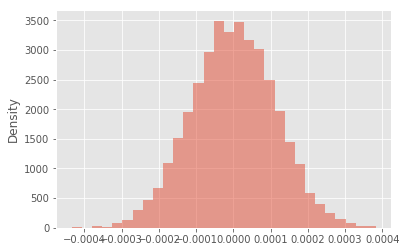

In [76]:
from symbulate import *

Z = RV(Normal(mean=0, sd=std_err))
sims = Z.sim(10000)
sims.plot(type="bar", bins=30)

sims.count_geq(obs_diff) / 10000

**ENTER YOUR INTERPRETATION HERE.**

## Question 6b (10 points)

Make a bar graph showing the percentage of boys named Michael in 2000 and 2010. Include standard error bars.

(Just write code in the cell below that outputs the final answer. No explanation required.)

In [86]:
percs = {'2000':p1, '2010':p2}
percentages = pd.DataFrame(percs, index=(0,1))
percentages

,2000,2010
0,0.01632,0.009048
1,0.01632,0.009048
